## Classification de critiques de films

Par CHACHA Ali Ahmed Bachir 

chachaaliahmed0@gmail.com

ESG@2022-2023 BD 5ème année

## 1. Importation des modules

In [76]:
import pickle 
import pandas as pd
import numpy as np                                              
#from textblob import TextBlob  
from sklearn.feature_extraction.text import CountVectorizer   
from sklearn.model_selection import train_test_split           
from sklearn.linear_model import LogisticRegression            
from sklearn.metrics import confusion_matrix                   
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords 
#from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 2. chargement des données

In [2]:
# Enregistrement des données dans des variables: pos_data = critiques positives| neg_data = critiques négatives 
    
pos_data = pd.read_pickle("/Users/aliahmedbachirchacha/Downloads/imdb_raw/imdb_raw_pos.pickle")
neg_data = pd.read_pickle("/Users/aliahmedbachirchacha/Downloads/imdb_raw/imdb_raw_neg.pickle")
    
print("Le dataset de critiques positives contient " + str(len(pos_data)) + " observations.")
print("Le dataset de critiques négatives contient " + str(len(neg_data)) + " observations.")

Le dataset de critiques positives contient 12500 observations.
Le dataset de critiques négatives contient 12500 observations.


In [14]:
positif_df = pd.DataFrame({"commentaire":pos_data})

In [15]:
negatif_df = pd.DataFrame({"commentaire":neg_data})

In [17]:
positif_df["sentiment"]=1
negatif_df["sentiment"]=0

In [20]:
positif_df.head()

,commentaire,sentiment
0,i went and saw this movie last night after bei...,1
1,actor turned director bill paxton follows up h...,1
2,as a recreational golfer with some knowledge o...,1
3,i saw this film in a sneak preview and it is ...,1
4,bill paxton has taken the true story of the ...,1


In [22]:
df_final = pd.concat([positif_df, negatif_df])

In [25]:
df_final

,commentaire,sentiment
0,i went and saw this movie last night after bei...,1
1,actor turned director bill paxton follows up h...,1
2,as a recreational golfer with some knowledge o...,1
3,i saw this film in a sneak preview and it is ...,1
4,bill paxton has taken the true story of the ...,1
...,...,...
12495,i occasionally let my kids watch this garbage ...,0
12496,when all we have anymore is pretty much realit...,0
12497,the basic genre is a thriller intercut with an...,0
12498,four things intrigued me as to this film - fir...,0


## 3. Prétraitements des données 

In [ ]:
caracteres_speciaux=[',','"','<br />',';','--','---','`','/',"'","]",'[','?',':','(',')','<','>','|','{','}','*','%','_','!',".",'~','1','2','3','4','5','6','7','8','9','0','$']

In [30]:
df_final['commentaire'].replace(caracteres_speciaux, '')

0        i went and saw this movie last night after bei...
1        actor turned director bill paxton follows up h...
2        as a recreational golfer with some knowledge o...
3        i saw this film in a sneak preview  and it is ...
4        bill paxton has taken the true story of the   ...
                               ...                        
12495    i occasionally let my kids watch this garbage ...
12496    when all we have anymore is pretty much realit...
12497    the basic genre is a thriller intercut with an...
12498    four things intrigued me as to this film - fir...
12499    david bryce s comments nearby are exceptionall...
Name: commentaire, Length: 25000, dtype: object

### Split data

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(df_final.commentaire,df_final.sentiment, test_size= 0.4)

In [35]:
print("X_train size : ", X_train.shape)
print("X_test size : ", X_test.shape)
print("Y_train size : ", Y_train.shape)
print("Y_test size : ", Y_test.shape)

X_train size :  (15000,)
X_test size :  (10000,)
Y_train size :  (15000,)
Y_test size :  (10000,)


## Vectorisation et création du model

In [64]:
vector_function=CountVectorizer(stop_words='english', binary=False,ngram_range=(1,1))

In [65]:
X_train_vector=cv.fit_transform(X_train)

In [66]:
X_test_vector=cv.transform(X_test)

In [67]:
X_test_vector.shape

(10000, 58866)

In [68]:
lr=LogisticRegression(max_iter=10000)

In [69]:
log=lr.fit(X_train_vector,Y_train)

In [70]:
log.score(X_train_vector, Y_train)

0.9988

In [71]:
log.score(X_test_vector, Y_test)

0.8757

### predict

In [72]:
prediction=lr.predict(X_test_vector)
print(prediction)

[1 0 0 ... 1 0 1]


#### confusion matrix (%)

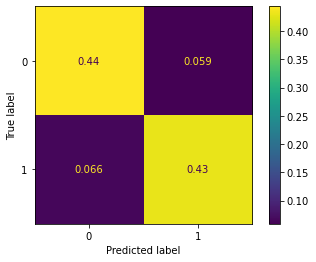

In [80]:
matrix=confusion_matrix(Y_test,prediction,labels=[1,0])/np.sum(confusion_matrix(Y_test,prediction,labels=[1,0]))
test = ConfusionMatrixDisplay(confusion_matrix=matrix)
test.plot()